In [1]:
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import category_encoders as ce

In [2]:
# sklearn preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures, QuantileTransformer 
from sklearn.pipeline import Pipeline

# sklearn evaluation
from  sklearn import metrics

# sklearn regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, VotingRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

from xgboost import XGBRegressor
from catboost import CatBoostRegressor

In [3]:
train_df = pd.read_csv("train.csv")
train_df.head()

,Customer_ID,months_as_customer,age,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,...,authorities_contacted,incident_state,incident_city,witnesses,police_report_available,auto_make,auto_model,auto_year,_c39,total_claim_amount
0,Customer_541,239,41,FEMALE,JD,farming-fishing,paintball,other-relative,51400,-6300,...,Police,NC,Arlington,2,YES,Mercedes,E400,2013,NaN,14386.67
1,Customer_440,108,31,MALE,Masters,protective-serv,yachting,not-in-family,0,0,...,Fire,NY,Columbus,2,NO,Dodge,Neon,2006,NaN,76440.00
2,Customer_482,116,30,MALE,JD,handlers-cleaners,golf,not-in-family,0,-35500,...,Other,WV,Riverwood,3,?,Volkswagen,Passat,2004,NaN,79560.00
3,Customer_422,8,21,MALE,High School,handlers-cleaners,hiking,husband,0,0,...,Other,WV,Columbus,0,?,Toyota,Corolla,2012,NaN,121680.00
4,Customer_778,161,38,MALE,PhD,priv-house-serv,exercise,not-in-family,60200,0,...,Police,WV,Springfield,2,YES,Volkswagen,Jetta,2003,NaN,80640.00


In [4]:
test = pd.read_csv("test.csv")
test.head()

,Customer_ID,months_as_customer,age,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,...,incident_severity,authorities_contacted,incident_state,incident_city,witnesses,police_report_available,auto_make,auto_model,auto_year,_c39
0,Customer_521,5,26,FEMALE,PhD,farming-fishing,skydiving,not-in-family,31500,0,...,Total Loss,Ambulance,WV,Springfield,3,?,Audi,A5,2003,NaN
1,Customer_737,160,33,FEMALE,High School,exec-managerial,exercise,husband,61600,0,...,Total Loss,Ambulance,NC,Riverwood,3,YES,Nissan,Pathfinder,2006,NaN
2,Customer_740,385,51,FEMALE,MD,craft-repair,reading,husband,0,-61000,...,Minor Damage,Other,WV,Riverwood,3,?,Suburu,Legacy,2007,NaN
3,Customer_660,446,57,MALE,College,adm-clerical,sleeping,unmarried,42700,-64900,...,Total Loss,Police,SC,Northbrook,0,NO,Jeep,Wrangler,2012,NaN
4,Customer_411,84,29,FEMALE,High School,machine-op-inspct,video-games,not-in-family,0,-29900,...,Trivial Damage,Police,SC,Arlington,0,YES,BMW,3 Series,2005,NaN


In [5]:
submission_df = pd.DataFrame()
submission_df["Customer_ID"] = test["Customer_ID"]

#### DATA DICTIONARY

* customer_ID - System-generated unique customerID
* months_as_customer - number of months a the insured as been a customer
* age - customer age
* insured_education_level - Most recent customers educational qualification
* insured_sex - gender
* insured_occupation - occupation of insured
* insured_hobbies - hobbies of insured
* insured_relationship - insured relationship
* capital-gains - capital gain
* capital-loss - capital-loss
* policy_number - policy_number
* policy_bind_date - policy blind insurance coverage
* policy_state -policy_state
* policy_csl - policy_csl
* policy_deductable -policy_deductable
* incident_location - incident_location
* incident_hour_of_the_day - incident_hour_of_the_day?
* number_of_vehicles_involved -number_of_vehicles_involved
* property_damage - property_damage
* bodily_injuries - bodily_injuries
* policy_annual_premium - policy_annual_premium
* umbrella_limit - umbrella_limit
* insured_zip -insured_zip
* incident_date - incident_date
* incident_type - incident_type
* collision_type - collision_type
* incident_severity - incident_severity
* authorities_contacted - authorities_contacted
* incident_state -incident_state
* incident_city - incident_city
* witnesses - witnesses
* police_report_available - police_report_available
* auto_make - auto_make
* auto_model - auto_model
* auto_year -auto_year
* _c39 - _c39
* total_claim_amount - total_claim_amount

In [6]:
# train_df.profile_report()

In [7]:
train_df.columns

Index(['Customer_ID', 'months_as_customer', 'age', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'policy_number', 'policy_bind_date', 'policy_state', 'policy_csl',
       'policy_deductable', 'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city', 'witnesses',
       'police_report_available', 'auto_make', 'auto_model', 'auto_year',
       '_c39', 'total_claim_amount'],
      dtype='object')

In [8]:
train_df["_c39"].isnull().sum()

700

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer_ID                  700 non-null    object 
 1   months_as_customer           700 non-null    int64  
 2   age                          700 non-null    int64  
 3   insured_sex                  700 non-null    object 
 4   insured_education_level      700 non-null    object 
 5   insured_occupation           700 non-null    object 
 6   insured_hobbies              700 non-null    object 
 7   insured_relationship         700 non-null    object 
 8   capital-gains                700 non-null    int64  
 9   capital-loss                 700 non-null    int64  
 10  policy_number                700 non-null    int64  
 11  policy_bind_date             700 non-null    object 
 12  policy_state                 700 non-null    object 
 13  policy_csl          

## Exploratory Data Analysis

In [10]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


<AxesSubplot:xlabel='insured_sex', ylabel='count'>

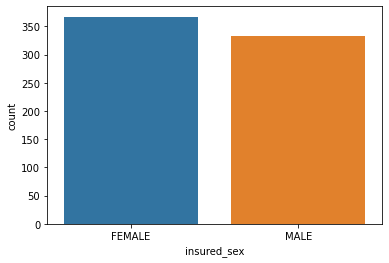

In [11]:
sns.countplot(x="insured_sex", data=train_df)

<AxesSubplot:xlabel='total_claim_amount'>

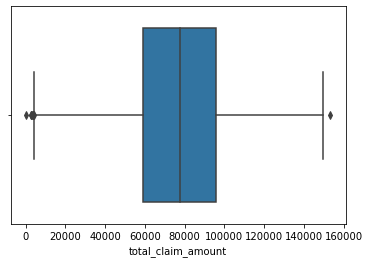

In [12]:
sns.boxplot(x="total_claim_amount", data=train_df)

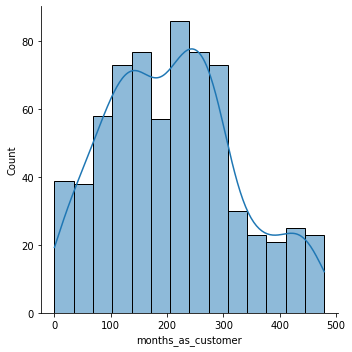

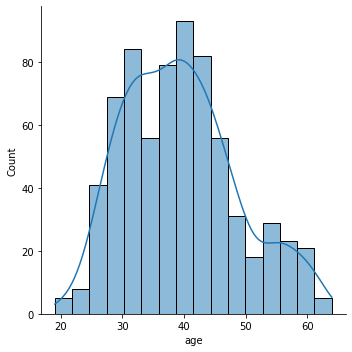

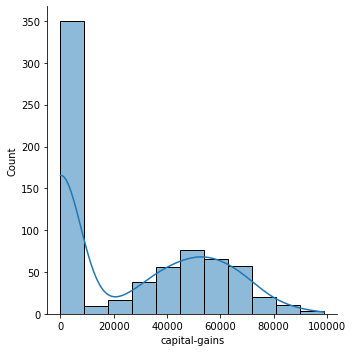

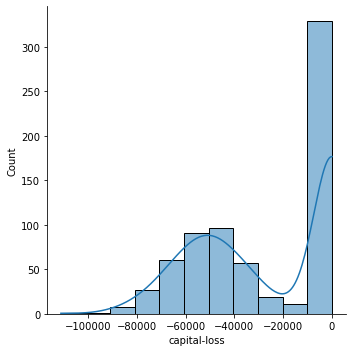

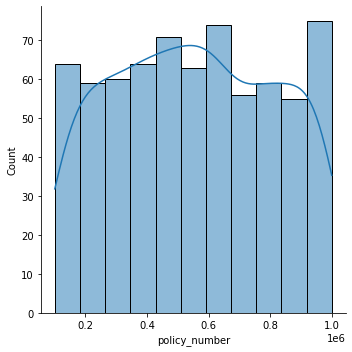

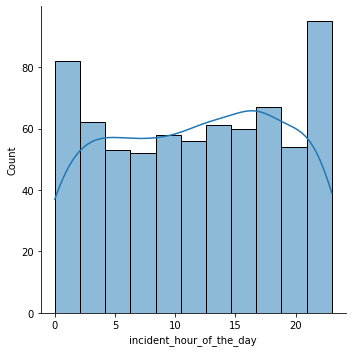

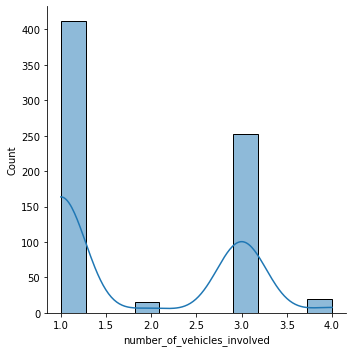

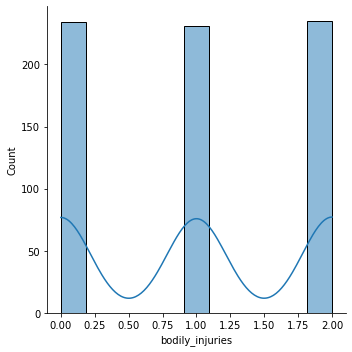

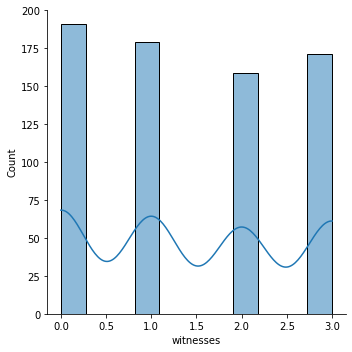

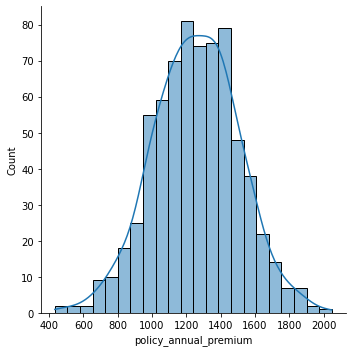

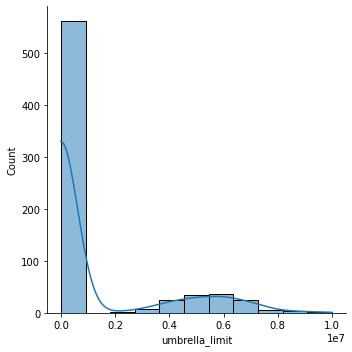

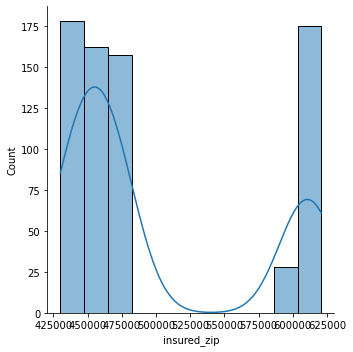

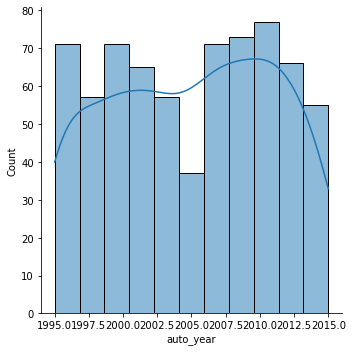

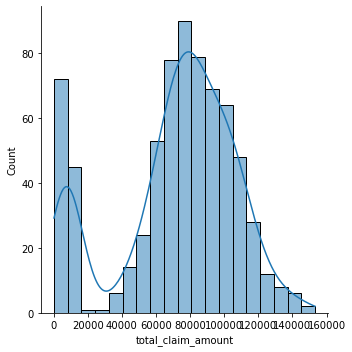

In [13]:
# use a for loop to plot each column from your dataframe
columns = ['months_as_customer', 'age', 'capital-gains', 'capital-loss',
       'policy_number', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip',
     'auto_year', 'total_claim_amount']
for column in columns:
    sns.displot(data= train_df, x= train_df[column], kde=True,)
#     plt.show()

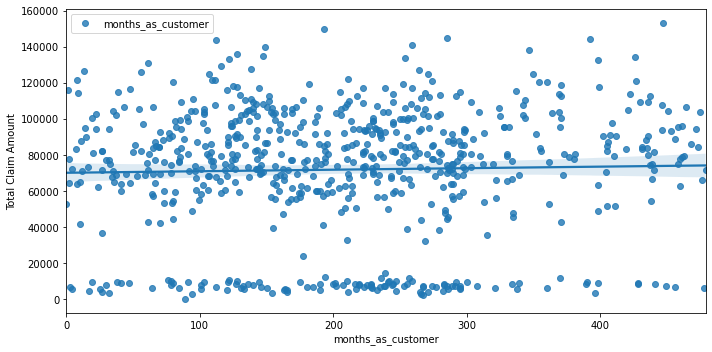

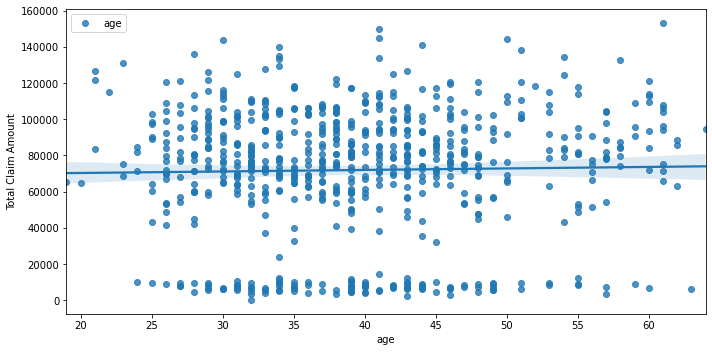

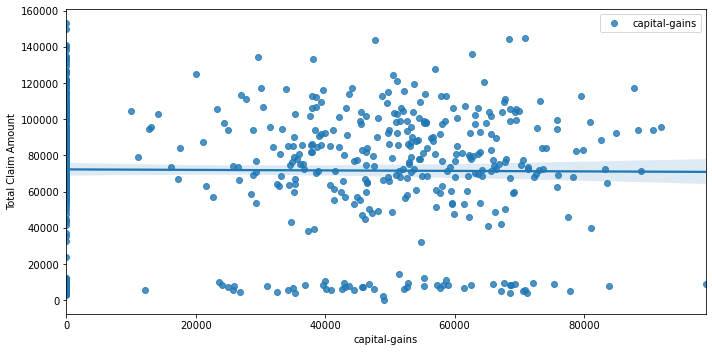

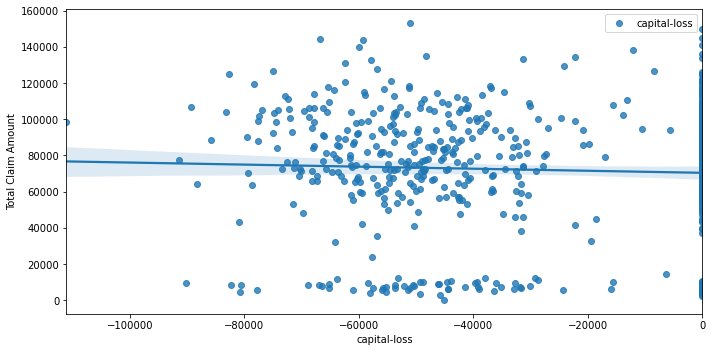

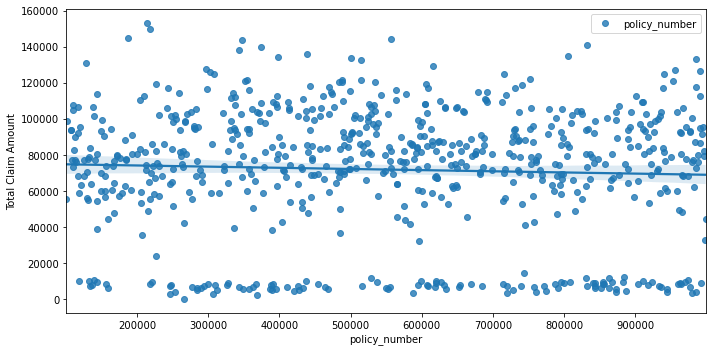

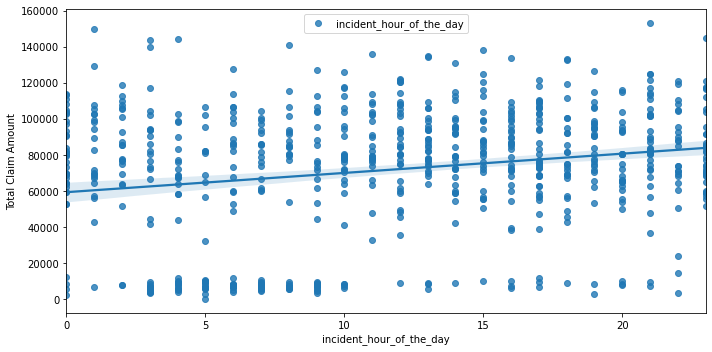

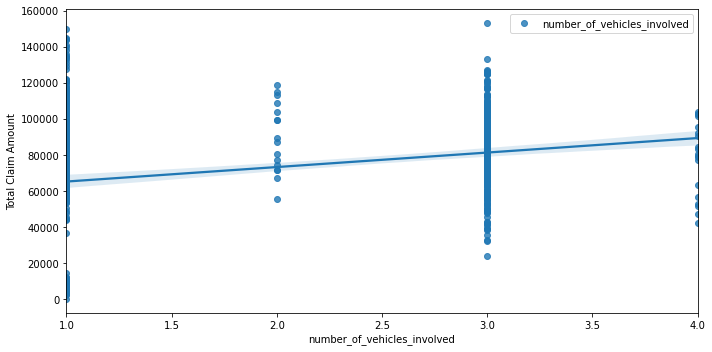

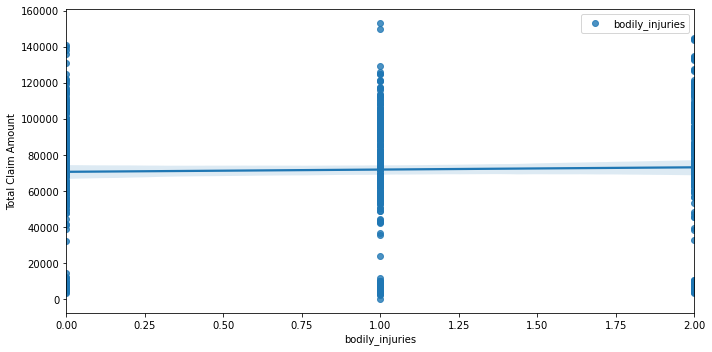

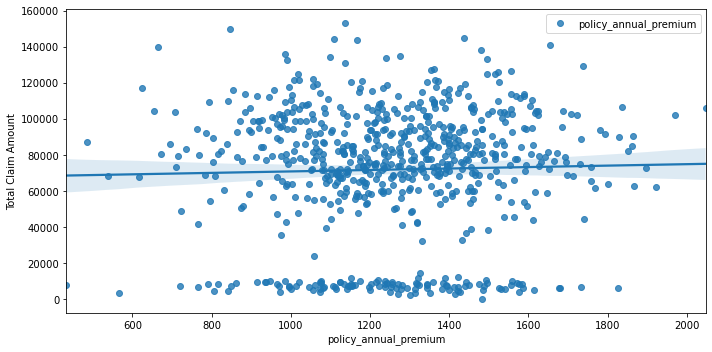

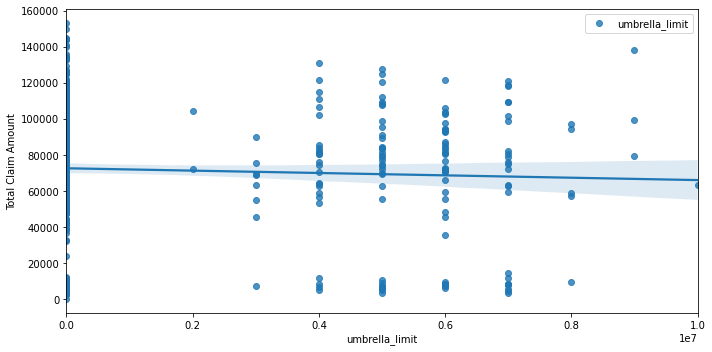

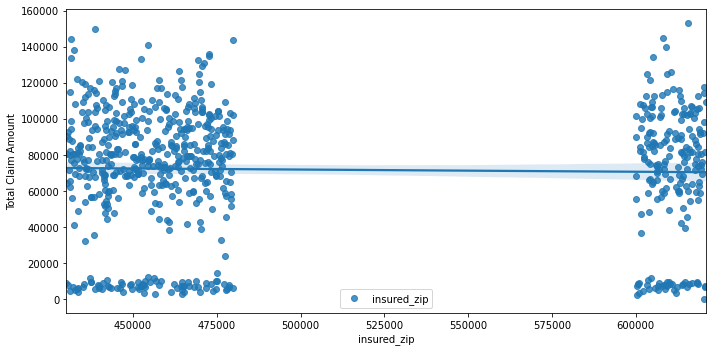

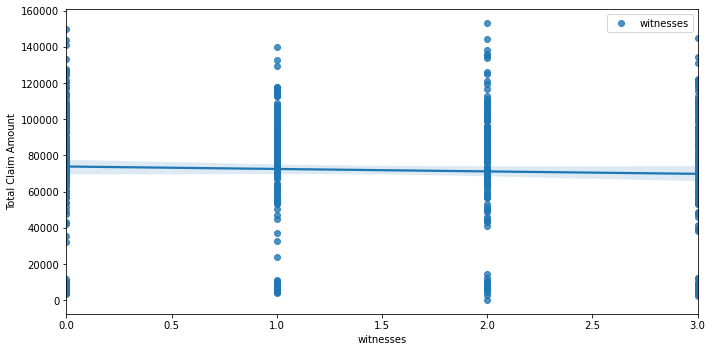

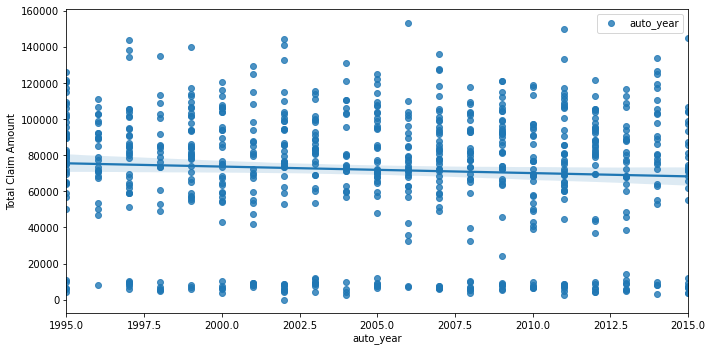

In [14]:
# to make plotting easier we will remove our target variable price from the main dataframe and save it on a separate one:
y = train_df['total_claim_amount']
X = train_df.drop(columns=['total_claim_amount'])
columns = ['months_as_customer', 'age', 'capital-gains', 'capital-loss',
       'policy_number', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip',
        'witnesses','auto_year']
# we use a for loop to plot our independent variables against our dependent one:
for col in columns:
    plt.figure(figsize=(10,5))
    sns.regplot(x=X[col], y=y, data=X, label=col)
    plt.ylabel('Total Claim Amount')
    plt.xlabel(col)
    plt.legend()
    plt.tight_layout()
    plt.show()

#### Data Preprocessing

* I replace the catrgorical variables with '?' with appropriate values.
* I used label encoding to transform the educational level feature
* I used catBoosterEncoder to encode features with high cardinality or too maany distinct values and pandas get_dummies for the rest of the categorical features.
* I dropped the columns I no longer need.y= train_df["total_claim_amount"]

In [15]:
train_df.loc[train_df["police_report_available"]== "?","police_report_available" ]= "Don't Know"
train_df.loc[train_df["collision_type"] == "?", "collision_type"] ="Rear Collision"
train_df.loc[train_df["property_damage"] == "?", "property_damage"] ="Partial Damage"

test.loc[test["police_report_available"]== "?","police_report_available" ]= "Don't Know"
test.loc[test["collision_type"] == "?", "collision_type"] ="Rear Collision"
test.loc[test["property_damage"] == "?", "property_damage"] ="Partial Damage"

In [16]:
cat_features = ["incident_date","incident_location","policy_bind_date", "insured_occupation", "insured_hobbies", "auto_model", "auto_make", "insured_education_level", 'insured_sex', 'insured_relationship','policy_state', 'policy_csl', 
       'property_damage', 'bodily_injuries','incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city', 'witnesses',
       'police_report_available']
y = train_df['total_claim_amount']

target_enc = ce.CatBoostEncoder(cols=cat_features)
target_enc.fit_transform(train_df[cat_features], y)
train_df = train_df.join(target_enc.transform(train_df[cat_features]).add_suffix('_cb'))
test = test.join(target_enc.transform(test[cat_features]).add_suffix('_cb'))

/Users/jayne/opt/anaconda3/envs/my-env/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [17]:
def transform_data(df):
#     df.loc[df["police_report_available"]== "?","police_report_available" ]= "Don't Know"
#     df.loc[df["collision_type"] == "?", "collision_type"] ="Rear Collision"
#     df.loc[df["property_damage"] == "?", "property_damage"] ="Partial Damage"
      
    df.drop(["Customer_ID", "_c39", "insured_education_level", "incident_date","incident_location","policy_bind_date", "insured_occupation", "insured_hobbies", "auto_model", "auto_make", 'insured_sex', 'insured_relationship','policy_state', 'policy_csl', 
       'property_damage', 'bodily_injuries','incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city', 'witnesses',
       'police_report_available'], axis=1, inplace=True)
    
    return df

In [18]:
train_df = transform_data(train_df)
train_df["property_damage_cb"].unique()

array([71230.29005162, 70100.71508095, 74498.83289736])

In [19]:
y= train_df["total_claim_amount"]
X= train_df.drop(["total_claim_amount"], axis=1,)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [21]:

# construct pipeline
# scaler = StandardScaler()
# normalise = MinMaxScaler()
# quantile = QuantileTransformer( output_distribution='normal', random_state=0, n_quantiles=100)
# poly_features = PolynomialFeatures(degree=2)
# lin_reg = Ridge(alpha=0.5, normalize=True)

# pipe = Pipeline([
#     ('scaler', scaler), ('quantile', quantile), ('poly', poly_features), ('regressor', lin_reg)
# ])

In [22]:
# pipe.named_steps

In [23]:
# pipe.fit(X_test, y_test)
# y_pred = pipe.predict(X_test)
# # y_pred
# print(pipe.score(X_train, y_train))

In [24]:
lasso_model = Lasso(alpha=0.3, normalize=True)
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.3, normalize=True)

In [25]:

lasso_prediction = lasso_model.predict(X_test)
# lasso_prediction


In [26]:
randomForest_model = RandomForestRegressor()
randomForest_model.fit(X_train,y_train)

RandomForestRegressor()

In [27]:
randomForest_prediction = randomForest_model.predict(X_test)
# randomForest_prediction

In [28]:
xgboostmodel = XGBRegressor(use_label_encoder= False)
xgboostmodel.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', use_label_encoder=False,
             validate_parameters=1, verbosity=None)

In [29]:
xgboost_prediction = xgboostmodel.predict(X_test)
# xgboost_prediction

/Users/jayne/opt/anaconda3/envs/my-env/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [30]:
ridgeReg = Ridge(alpha=0.05, normalize=True)

ridgeReg.fit(X_train,y_train)

pred = ridgeReg.predict(X_test)
# pred

#### Model Evaluation



In [31]:
models = [LinearRegression(), RandomForestRegressor(random_state=0, n_estimators=100), DecisionTreeRegressor(), XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', use_label_encoder=False,
             validate_parameters=1, verbosity=None), KNeighborsRegressor(),SVR(), Ridge(alpha=0.05, normalize=True), Lasso(alpha=0.3, normalize=True), GradientBoostingRegressor(), AdaBoostRegressor(random_state=0, n_estimators=100)]

In [32]:
for model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    MSE = metrics.mean_squared_error(y_test,predictions )
    print(type(model).__name__, metrics.mean_absolute_error(y_test, predictions), "       Root mean squared error", np.sqrt(MSE))

LinearRegression 14859.108721129953        Root mean squared error 19036.83212779872
RandomForestRegressor 14162.874600000001        Root mean squared error 18907.913011858353
DecisionTreeRegressor 22065.52435714286        Root mean squared error 29263.272234023156


/Users/jayne/opt/anaconda3/envs/my-env/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


XGBRegressor 15557.951256243026        Root mean squared error 20191.094829363974
KNeighborsRegressor 19497.276614285714        Root mean squared error 25596.988461594767
SVR 24425.723593888604        Root mean squared error 32938.182446961786
Ridge 14805.727298368967        Root mean squared error 19171.316181018832
Lasso 14853.578749283612        Root mean squared error 19029.17537763225
GradientBoostingRegressor 14859.44020003813        Root mean squared error 18861.41766416081
AdaBoostRegressor 14507.745089521486        Root mean squared error 19597.85880131928


Work on my test data

In [33]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 58 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer_ID                  300 non-null    object 
 1   months_as_customer           300 non-null    int64  
 2   age                          300 non-null    int64  
 3   insured_sex                  300 non-null    object 
 4   insured_education_level      300 non-null    object 
 5   insured_occupation           300 non-null    object 
 6   insured_hobbies              300 non-null    object 
 7   insured_relationship         300 non-null    object 
 8   capital-gains                300 non-null    int64  
 9   capital-loss                 300 non-null    int64  
 10  policy_number                300 non-null    int64  
 11  policy_bind_date             300 non-null    object 
 12  policy_state                 300 non-null    object 
 13  policy_csl          

In [34]:
test = transform_data(test)
test.head()

,months_as_customer,age,capital-gains,capital-loss,policy_number,policy_deductable,incident_hour_of_the_day,number_of_vehicles_involved,policy_annual_premium,umbrella_limit,...,property_damage_cb,bodily_injuries_cb,incident_type_cb,collision_type_cb,incident_severity_cb,authorities_contacted_cb,incident_state_cb,incident_city_cb,witnesses_cb,police_report_available_cb
0,5,26,31500,0,924318,2000,22,1,1137.02,0,...,74498.832897,68880.377428,87342.322849,55418.864171,82894.258063,80156.505131,67785.917155,70250.932044,68811.827170,71979.885703
1,160,33,61600,0,180286,1000,17,3,1422.78,0,...,71230.290052,74621.953022,82187.707762,86749.913679,82894.258063,80156.505131,68639.745910,74131.551110,68811.827170,74130.840983
2,385,51,0,-61000,178081,1000,14,3,976.37,0,...,71230.290052,68880.377428,82187.707762,55418.864171,65821.128286,88063.413089,67785.917155,74131.551110,68811.827170,71979.885703
3,446,57,42700,-64900,991480,2000,10,3,1373.21,0,...,70100.715081,72150.330099,82187.707762,86749.913679,82894.258063,64283.370702,73782.560259,67990.432221,74685.733715,69813.469575
4,84,29,0,-29900,630998,1000,6,1,1117.17,0,...,74498.832897,74621.953022,8160.361262,55418.864171,8497.835331,64283.370702,73782.560259,70698.134304,74685.733715,74130.840983


In [35]:
# test.profile_report()

In [36]:
# for model in models:
#     model.fit(X_train, y_train)
#     predictions = model.predict(test)
#     print(type(model).__name__, predictions)

predictions = randomForest_model.predict(test)
predictions

array([ 76146.4   ,  73828.9327,  71893.067 ,  86834.0002,   8734.5338,
        96372.1335,  84493.5992,  70716.3997,  80534.5333,   8185.7342,
         6598.2671,  88351.1997,   7803.6   ,  80240.1331,  80096.7996,
         7884.9345,  82161.333 ,  83223.7331,  83380.9336,  84581.3332,
        88413.3329,   8094.267 ,  87741.8665,   8205.0663,   7200.4001,
        86620.1337,  75172.7996,  84074.1329,  82933.733 ,  81746.7991,
        85014.0005,  91625.7329,  91700.9336,  92391.9999,  96559.9996,
        84714.1331,  79086.8002,   6478.267 ,  89215.9998,  94177.7332,
        84790.6667,  94015.7329,  96846.7997,  93281.1996,  81985.8667,
        90547.8669,  85302.1332,  86057.7334,   8008.6668,   8017.0673,
        80125.4666,  81184.5335,  82725.0658,  86166.5336,  82537.0665,
        81678.7999,  79053.2002,  93896.7998,  86964.5335,   7324.4003,
        83923.5998,   7982.667 ,  79290.3994,   7720.4   ,  75794.9328,
         7429.4663,  83585.1994,  95120.5331,  75902.9333,  7873

<BarContainer object of 34 artists>

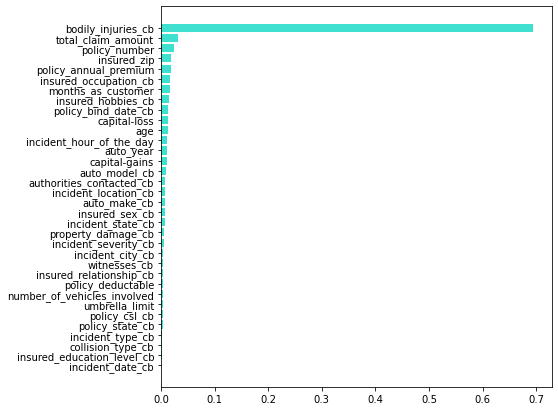

In [37]:
sorted_feature_importance = randomForest_model.feature_importances_.argsort()
plt.figure(figsize=(7,7))
plt.barh(train_df.columns[sorted_feature_importance],
randomForest_model.feature_importances_[sorted_feature_importance],color='turquoise')

In [38]:
xgboost_prediction = xgboostmodel.predict(test)
# xgboost_prediction

/Users/jayne/opt/anaconda3/envs/my-env/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [39]:

submission_df["total_claim_amount"] = predictions
submission_df.to_csv("submission.csv", index=False)
submission_df.head()

,Customer_ID,total_claim_amount
0,Customer_521,76146.4000
1,Customer_737,73828.9327
2,Customer_740,71893.0670
3,Customer_660,86834.0002
4,Customer_411,8734.5338


In [40]:
categorical_features_indices = np.where(X.dtypes != np.float)[0]

In [41]:
# train_dataset = cb.Pool(X_train, y_train)
# test_dataset = cb.Pool(X_test, y_test)

In [42]:
model=CatBoostRegressor(iterations=30, depth=3, learning_rate=0.1, random_state=0, loss_function='RMSE')
model.fit(X_train, y_train,cat_features=categorical_features_indices,eval_set=(X_test, y_test),plot=True, use_best_model=True)
plt.show()

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 32976.6533125	test: 31485.5768269	best: 31485.5768269 (0)	total: 52.8ms	remaining: 1.53s
1:	learn: 31065.1139855	test: 29825.2066544	best: 29825.2066544 (1)	total: 54.2ms	remaining: 759ms
2:	learn: 29318.1957455	test: 28310.0882067	best: 28310.0882067 (2)	total: 55.4ms	remaining: 499ms
3:	learn: 27861.8992840	test: 27081.3940148	best: 27081.3940148 (3)	total: 56.8ms	remaining: 369ms
4:	learn: 26538.2404397	test: 25933.5056846	best: 25933.5056846 (4)	total: 58ms	remaining: 290ms
5:	learn: 25403.8096034	test: 24940.2934298	best: 24940.2934298 (5)	total: 59.4ms	remaining: 238ms
6:	learn: 24444.5943736	test: 24104.6397760	best: 24104.6397760 (6)	total: 60.6ms	remaining: 199ms
7:	learn: 23645.6198735	test: 23397.9196383	best: 23397.9196383 (7)	total: 61.9ms	remaining: 170ms
8:	learn: 22956.3126074	test: 22784.5886676	best: 22784.5886676 (8)	total: 63.5ms	remaining: 148ms
9:	learn: 22369.2540469	test: 22262.2668475	best: 22262.2668475 (9)	total: 64.9ms	remaining: 130ms
10:	learn: 2

In [43]:
pred = model.predict(X_test)
rmse = np.sqrt(metrics.mean_squared_error(y_test,pred))
r2 = metrics.r2_score(y_test, pred)

print("Testing performance")
print('RMSE: {:.2f}'.format(rmse))
print('R2: {:.2f}'.format(r2))

Testing performance
RMSE: 19275.03
R2: 0.66


<BarContainer object of 34 artists>

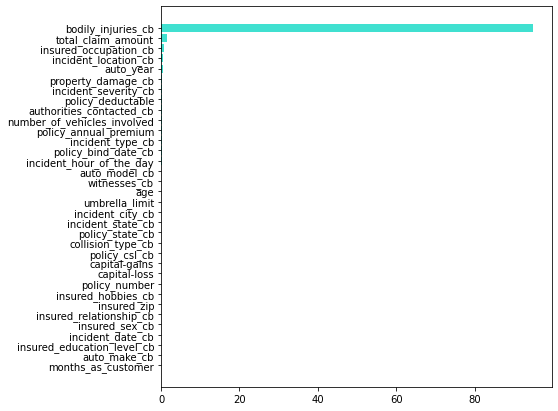

In [44]:
sorted_feature_importance = model.feature_importances_.argsort()
plt.figure(figsize=(7,7))
plt.barh(train_df.columns[sorted_feature_importance],
model.feature_importances_[sorted_feature_importance],color='turquoise')

In [45]:
cat_prediction = model.predict(test)
cat_prediction

array([81267.4673492 , 81124.8618321 , 78334.59415992, 84613.21726882,
       11386.42784172, 82362.44087537, 80838.71048592, 80568.04095806,
       83697.44642663, 12481.91716748, 13614.61679468, 83498.85056403,
       12763.87291114, 82921.72604977, 87237.01829532, 14022.50679507,
       79897.76778919, 81801.24112606, 80643.2746696 , 82848.35741227,
       80573.93599274, 11739.30857319, 79921.46249041, 15025.43012361,
       13433.30554302, 83396.72548614, 81410.06989758, 83971.57464385,
       83124.10316759, 84265.62330646, 81797.03828928, 85585.75689786,
       85123.30997629, 86393.93985736, 84353.88851898, 84387.75153176,
       81649.76699168, 11888.07525565, 88036.34312015, 83377.74280486,
       84305.60219116, 86668.41215505, 89196.54632536, 85034.43566736,
       82808.68054902, 86683.35183895, 84732.39426248, 84529.03406722,
       13491.01853489, 11709.08471843, 80055.67055228, 84413.63740963,
       81562.40381117, 80477.63566301, 85872.80929941, 80421.9946879 ,
      

In [46]:
submission_df["total_claim_amount"] = cat_prediction
submission_df.to_csv("submission.csv", index=False)
submission_df.head()

,Customer_ID,total_claim_amount
0,Customer_521,81267.467349
1,Customer_737,81124.861832
2,Customer_740,78334.594160
3,Customer_660,84613.217269
4,Customer_411,11386.427842


In [47]:
reg1 = GradientBoostingRegressor(random_state=1)
# reg2 = RandomForestRegressor(random_state=1)
reg3 = CatBoostRegressor(iterations=30, depth=3, learning_rate=0.1, random_state=0, loss_function='RMSE')
reg4 = AdaBoostRegressor(random_state=0, n_estimators=100)
ereg = VotingRegressor(estimators=[('gb', reg1), ('cb', reg3), ("ad", reg4)])
ereg.fit(X_train, y_train)
predd = ereg.predict(X_test)
predd

0:	learn: 32979.4880868	total: 662us	remaining: 19.2ms
1:	learn: 31034.0573065	total: 1.52ms	remaining: 21.3ms
2:	learn: 29365.4938401	total: 2.16ms	remaining: 19.5ms
3:	learn: 27904.6406029	total: 2.83ms	remaining: 18.4ms
4:	learn: 26637.6260251	total: 3.48ms	remaining: 17.4ms
5:	learn: 25507.0327125	total: 4.08ms	remaining: 16.3ms
6:	learn: 24529.3352530	total: 4.7ms	remaining: 15.4ms
7:	learn: 23653.4106823	total: 5.33ms	remaining: 14.7ms
8:	learn: 22946.2348730	total: 5.94ms	remaining: 13.9ms
9:	learn: 22336.0991823	total: 6.6ms	remaining: 13.2ms
10:	learn: 21806.5514567	total: 7.25ms	remaining: 12.5ms
11:	learn: 21367.2983443	total: 7.73ms	remaining: 11.6ms
12:	learn: 21018.0769906	total: 8.38ms	remaining: 11ms
13:	learn: 20688.2180760	total: 8.94ms	remaining: 10.2ms
14:	learn: 20393.9372897	total: 9.51ms	remaining: 9.51ms
15:	learn: 20163.4979361	total: 10ms	remaining: 8.78ms
16:	learn: 19947.2480917	total: 10.6ms	remaining: 8.13ms
17:	learn: 19786.4394671	total: 11.2ms	remaining

array([ 9895.7075053 , 81271.04715055, 76918.98982811, 80601.4353979 ,
       90378.49241433, 78666.29086658,  8856.42508836, 87965.15370757,
        9542.36637078, 95596.01955686, 90189.89412429, 91443.35792007,
       84350.93752854, 82080.84668341, 83240.25397147, 81475.84218798,
       78000.5200017 , 81706.82203865, 74360.49821724, 87186.05468159,
       79929.21596988, 84001.84020641,  9399.28031858, 84509.81532479,
       15047.35398408, 82409.50716965, 75312.03764313, 78848.34402588,
       83018.91552202, 10330.53684434, 83075.48313679, 79796.75994122,
       79132.75705088, 87722.20849835, 79737.87081329, 78427.23903476,
       86336.95187529, 92086.36465427, 86934.3819019 , 10665.61994558,
       88872.13863883, 87473.33867023, 99488.34924018, 76432.6414317 ,
       89297.21305787, 79762.84007085, 77189.92388554, 77041.39584021,
       95875.78525024, 82203.76946759, 78841.36454906, 81552.26024879,
       78776.30079023, 87191.87246868, 92071.92637389, 84533.84551667,
      

In [48]:
rmse = np.sqrt(metrics.mean_squared_error(y_test,predd))
r2 = metrics.r2_score(y_test, predd)

print("Testing performance")
print('RMSE: {:.2f}'.format(rmse))
print('R2: {:.2f}'.format(r2))

Testing performance
RMSE: 18806.83
R2: 0.67


In [49]:
predd_y = ereg.predict(test)
predd_y

array([ 79370.01673533,  80332.16934822,  79631.03097609,  89709.05408066,
        10443.71224109,  91824.16693691,  80168.26961398,  73400.35632146,
        86479.39784748,  13363.05647884,   9685.1002685 ,  83776.94111273,
        12907.80455078,  79372.33295313,  87207.21759627,  13390.65651796,
        77502.45851614,  83202.55781184,  84020.75112026,  82896.42666074,
        82282.47637029,  10640.18343478,  77758.43049252,  11100.04306825,
        11673.38274204,  94167.97455569,  78224.5219977 ,  83345.54281339,
        82503.73983753,  89665.00463191,  81459.041037  ,  91065.19045607,
        95500.45186338,  87053.59198517,  92142.11885065,  84711.52583062,
        77759.730376  ,   8792.40674499,  90633.56949048,  98930.48002487,
        85714.50524022,  98539.9692452 ,  88436.32630877,  87013.38585457,
        85472.18346278,  87707.76257458,  86793.19380365,  91845.27671301,
         9911.29903516,   8750.9873744 ,  78880.37564713,  85646.83755342,
        81687.99027561,  

In [50]:
# submission_df["total_claim_amount"] = predd_y
# submission_df.to_csv("submission.csv", index=False)
# submission_df.head()